In [1]:
import numpy as np
import torch as T
import copy
import time
import matplotlib.pyplot as plt


import Pyccat
from Pyccat import field_calculation

import Kirchhoffpy
from Kirchhoffpy.Spheical_field import spheical_grid
from Kirchhoffpy.coordinate_operations import Coord


In [2]:
# define the parameters input files
inputfile='CCAT_model'
sourcefile='beam'
defocus=[0,0,700]
ad_m2=np.zeros(5*69)
ad_m1=np.zeros((5,77))
Ns=101
#source_field=spheical_grid(-0.005,0.005,-0.005,0.005,Ns,Ns,distance=300*10**3)
source=Coord()
source0=np.genfromtxt(sourcefile+'/on-axis.txt',delimiter=',')
source.x=source0[...,0];source.y=source0[...,1];source.z=source0[...,2]
Field_s,Field_fimag,Field_m1,Field_m2=field_calculation(inputfile,source,defocus,ad_m2,ad_m1)
S=(Field_s.real+1j*Field_s.imag).reshape(Ns,Ns)

time used: 27.889956499999997


In [8]:
beam=S
x=source.x.reshape(Ns,-1)

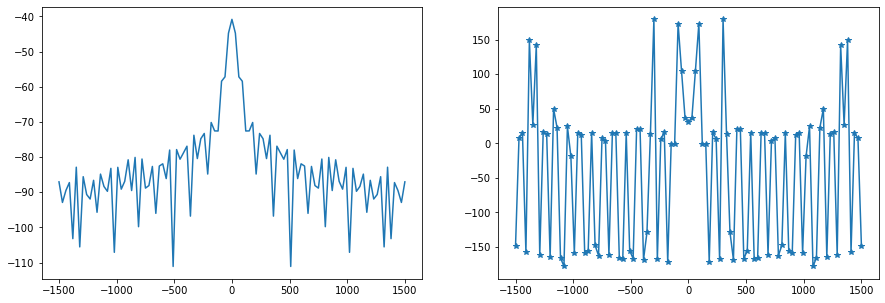

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cmap='jet'
p1=axs[0].plot(x[50,:],20*np.log10(np.abs(beam[50,:])))
p2=axs[1].plot(x[50,:],np.angle(beam[50,:])*180/np.pi,'*-')
plt.show()

In [10]:
beam.real

array([[-1.18969104e-07, -3.99129141e-08,  1.38001146e-07, ...,
         1.38001145e-07, -3.99129155e-08, -1.18969102e-07],
       [-9.72469717e-07, -6.00950453e-07,  1.12670621e-06, ...,
         1.12670621e-06, -6.00950450e-07, -9.72469715e-07],
       [-3.58119282e-07, -3.43570510e-07,  2.43666601e-07, ...,
         2.43666606e-07, -3.43570509e-07, -3.58119284e-07],
       ...,
       [ 5.59501977e-07,  2.33681902e-07, -6.71534158e-07, ...,
        -6.71534154e-07,  2.33681901e-07,  5.59501977e-07],
       [ 5.87395553e-07, -1.10198298e-06, -1.22723673e-06, ...,
        -1.22723673e-06, -1.10198298e-06,  5.87395556e-07],
       [-1.45654997e-07, -2.02077575e-08,  2.92939411e-07, ...,
         2.92939411e-07, -2.02077590e-08, -1.45654997e-07]])

In [11]:
beam.imag

array([[-4.37770412e-07,  2.29133834e-07,  4.76245211e-07, ...,
         4.76245209e-07,  2.29133833e-07, -4.37770406e-07],
       [-2.26880590e-07, -3.10807011e-07,  1.97106928e-07, ...,
         1.97106931e-07, -3.10807011e-07, -2.26880590e-07],
       [-4.25794025e-08, -6.02660358e-07, -1.63339985e-07, ...,
        -1.63339988e-07, -6.02660360e-07, -4.25793992e-08],
       ...,
       [-5.88546063e-08,  3.76623225e-07,  1.41999731e-08, ...,
         1.41999737e-08,  3.76623225e-07, -5.88546090e-08],
       [-2.86677543e-07, -3.03484095e-07,  1.04364281e-07, ...,
         1.04364281e-07, -3.03484094e-07, -2.86677542e-07],
       [-3.10906591e-07, -1.67868812e-07,  2.90620381e-07, ...,
         2.90620381e-07, -1.67868811e-07, -3.10906592e-07]])